# EDA of Archigos 4.1
https://www.rochester.edu/college/faculty/hgoemans/Archigos_4.1.pdf

Author: Kevin Fulgham

A Note from the Author
Goal - to provide an outline for how some people might approach tackling a new dataset.

Data Set:
'Archigos  is  a  data  base  of  political  leaders.   For  each  state  considered  an  independent state in the Gleditsch and Ward (1999) compilation of independent states,  we identify the effective primary ruler.  The data identify the manner by which rulers enter and leave political power, the post-tenure fate of the ruler, as well as other personal characteristics.'

Table of Contents:
- [Clean Data](#clean_data)
    - [Data Type](#data_types)
    - [Country & Region Codes](#country_code)
   
- [Data Exploration](#data_exploration)
    - [Regime Type Entry & Exit](#regime_type)
    - [Duration](#regime_type)

To get started, you want to make sure you have the following packages installed:

    numpy (numerical manipulation/calculation)
    pandas (dataframe manipulation - simple tabular formats)
    sci-kit learn (machine learning)
    sciy.stats chi2_contingency (chi squared categorical)
    matplotlib (basic data visualization)
    seaborn (shinier data visualization)


In [45]:
import numpy as np
import pandas as pd
import sklearn
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
%matplotlib inline

In [89]:
df = pd.read_stata('Archigos_4.1.dta')
df.head()

/Users/kfulgham/opt/anaconda3/lib/python3.8/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,...,ebirthdate,deathdate,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,NaT,1885-07-23,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,NaT,1893-01-17,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-03-04,1881-09-19,1881-09-19,Regular,...,NaT,1881-09-19,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,0,3.0,11,3.0,NA,NA
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,NaT,1886-11-18,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,NaT,1908-06-24,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA


In [47]:
df.shape

(3409, 28)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3408
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   obsid              3409 non-null   object        
 1   leadid             3409 non-null   object        
 2   ccode              3409 non-null   int16         
 3   idacr              3409 non-null   object        
 4   leader             3409 non-null   object        
 5   startdate          3409 non-null   object        
 6   eindate            3409 non-null   datetime64[ns]
 7   enddate            3409 non-null   object        
 8   eoutdate           3409 non-null   datetime64[ns]
 9   entry              3409 non-null   object        
 10  exit               3409 non-null   object        
 11  exitcode           3409 non-null   object        
 12  prevtimesinoffice  3409 non-null   int8          
 13  posttenurefate     3409 non-null   object        
 14  gender  

## Clean the Data <a class="anchor" id="clean_data"></a>

### Data Types <a class="anchor" id="data_types"></a>

Looking at the data, the Archigos datset contains categorical dummy coding, and time-date information, not all of it converted directly from the DTA in the correct dtype

In [49]:
df["ccode"] = df['ccode'].astype('object')
df["startdate"] = df['startdate'].astype('datetime64[ns]')
df["enddate"] = df['enddate'].astype('datetime64[ns]')
df["numentry"] = df['numentry'].astype('category')
df["numexit"] = df['numexit'].astype('category')
df["numposttenurefate"] = df['numposttenurefate'].astype('category')
df["ftcur"] = df['ftcur'].astype('category')
df.dtypes

obsid                        object
leadid                       object
ccode                        object
idacr                        object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
ebirthdate           datetime64[ns]
deathdate                    object
edeathdate           datetime64[ns]
dbpediauri                   object
numentry                   category
numexit                    category
numexitcode                   int16
numposttenurefate          category
fties                        object
ftcur                      c

In [50]:
df.isnull().sum()

obsid                   0
leadid                  0
ccode                   0
idacr                   0
leader                  0
startdate               0
eindate                 0
enddate                 0
eoutdate                0
entry                   0
exit                    0
exitcode                0
prevtimesinoffice       0
posttenurefate          0
gender                  0
yrborn                  0
yrdied                  0
borndate                0
ebirthdate           1289
deathdate               0
edeathdate           2563
dbpediauri              0
numentry                0
numexit                 0
numexitcode             0
numposttenurefate       0
fties                   0
ftcur                   0
dtype: int64

### Country & World Region Codes <a class="anchor" id="country_code"></a>

In [51]:
#IDACR code is a county code found in the Correlations of War: http://www.correlatesofwar.org/data-sets, However we will convert them in more common ISO country code set
df.idacr.unique()

array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'MEX', 'BLZ', 'GUA', 'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL',
       'VEN', 'GUY', 'SUR', 'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL',
       'ARG', 'URU', 'UKG', 'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'SWZ',
       'SPN', 'POR', 'BAV', 'GMY', 'GFR', 'GDR', 'POL', 'AUH', 'AUS',
       'HUN', 'CZE', 'CZR', 'SLO', 'ITA', 'MLT', 'ALB', 'SER', 'MNG',
       'MAC', 'CRO', 'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL',
       'MLD', 'RUM', 'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM',
       'GRG', 'AZE', 'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'GNB',
       'EQG', 'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI',
       'BFO', 'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN',
       'CHA', 'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'ZAN', 'BUI', 'RWA',
       'SOM', 'DJI', 'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW',
       'SAF', 'TRA', 'OFS', 'NAM', 'LES', 'BOT', 'SWA', 'MAG', 'COM',
       'MAS', 'MOR',

Rename Country and World Regions using the more widely accepted United Nations GeoScheme
: https://unstats.un.org/unsd/methodology/m49/ and International Standard of Organization 3 Letter Country Codes : https://www.iso.org/iso-3166-country-codes.html


In [52]:
country = {'USA':'United States','CAN': 'Canada', 'BHM': 'Bahamas','CUB':'Cuba','HAI':'Haiti',
           'DOM':'Dominican Republic','JAM':'Jamaica','TRI':'Trinidad Tobago','BAR':'Barbados',
           'MEX':'Mexico', 'BLZ':'Belize','GUA':'Guatamala','HON':'Honduras','SAL':'El Salvador',
           'NIC':'Nicaragua','COS':'Costa Rica','PAN':'Panama','COL':'Colombia','VEN':'Venezuela',
           'GUY':'Guyana','SUR':'Suriname','ECU':'Ecuador','PER':'Peru','BRA':'Brazil','BOL':'Bolivia',
           'PAR':'Paraguay','CHL':'Chile','ARG':'Argentina','URU':'Uruguay','UKG':'United Kingdom',
           'IRE':'Ireland','NTH':'Netherlands','BEL':'Belgium','LUX':'Luxembourg','FRN':'France',
           'SWZ':'Switzerland','SPN':'Spain','POR':'Portugal','BAV':'Bavaria','GMY':'Germany',
           'GFR':'German Federal Republic','GDR':'German Democratic Republic','POL':'Poland',
           'AUH':'Austria Hungary','AUS':'Austria','HUN':'Hungary','CZE':'Czechoslovakia','CZR': 'Czech Republic',
           'SLO':'Slovakia','ITA':'Italy','MLT':'Malta','ALB':'Albania','SER':'Serbia','MNG':'Montenegro',
           'MAC':'Republic of Northern Macedonia','CRO':'Croatia','YUG':'Yugoslavia','BOS':'Bosnia',
           'KOS':'Kosovo','SLV':'Slovenia','GRC':'Greece','CYP':'Cyprus','BUL':'Bulgaria','MLD':'Moldova',
           'RUM':'Romania','RUS':'Russia','EST':'Estonia','LAT':'Latvia','LIT':'Lithuania','UKR':'Ukraine',
           'BLR':'Belarus','ARM':'Armenia','GRG':'Georgia','AZE':'Azerbaijan','FIN':'Finland',
           'SWD':'Sweden','NOR':'Norway','DEN':'Denmark','ICE':'Iceland','CAP':'Cape Verde',
           'GNB':'Guinea-Bissau','EQG':'Equatorial Guinea','GAM':'Gambia','MLI':'Mali','SEN':'Senegal',
           'BEN':'Benin','MAA':'Mauritania','NIR':'Niger','CDI':'Ivory Coast','GUI':'Guinea','BFO':'Burkina Faso',
           'LBR':'Liberia','SIE':'Sierra Leone','GHA':'Ghana','TOG':'Togo','CAO':'Cameroon','NIG':'Nigeria',
           'GAB':'Gabon','CEN':'Centeral Africa Republic','CHA':'Chad','CON':'Republic of Congo',
           'DRC':'Democratic Republic of Congo','UGA':'Uganda','KEN':'Kenya','TAZ':'Tanzania','ZAN':'Zanzibar',
           'BUI':'Burundi','RWA':'Rwanda','SOM':'Somalia','DJI':'Djbouti','ETH':'Ethopia','ERI':'Eriteria',
           'ANG':'Angola','MZM':'Mozambique','ZAM':'Zambia','ZIM':'Zimbabwe','MAW':'Malawi','SAF':'South Africa',
           'TRA':'Transvaal','OFS':'Orange Free State','NAM':'Nambibia','LES':'Lesotho','BOT':'Botswana',
           'SWA':'Swaziland','MAG':'Madagascar','COM':'Comorros','MAS':'Mauritius','MOR':'Morocco',
           'ALG':'Algeria','TUN':'Tunisia','LIB':'Libya','SUD':'Sudan','SSD':'South Sudan','IRN':'Iran',
           'TUR':'Turkey','IRQ':'Iraq','EGY':'Egypt','SYR':'Syria','LEB':'Lebanon','JOR':'Jordan',
           'IRS':'Israel','SAU':'Saudi Arabia','YEM':'Yemen','YPR':'Yemen Peoples Republic',
           'KUW':'Kuwait','BAH':'Bahrain','QAT':'Qatar','UAE':'United Arab Emirates','OMA':'Oman',
           'AFG':'Afghanistan','TKM':'Turkmenistan','TAJ':'Tajikistan','KYR':'Kyrgyzstan',
           'CHN':'China','TBT':'Tibet','MON':'Mongalia','TAW':'Taiwan','KOR':'Korea','PRK':'Peoples Republic of Korea',
           'ROK':'Republic of Korea','JPN':'Japan','IND':'India','BHU':'Bhutan','PAK':'Pakistan',
           'BNG':'Bangladesh','SRI':'Sri Lanka','MAD':'Maldives','NEP':'Nepal','THI':'Thailand',
           'CAM':'Cambodia','LAO':'Laos','VNM':'Vietnam','DRV':'Vietnam','RVN':'Republic of Vietnam',
           'VIE':'Vietnam','MAL':'Malaysia','SIN':'Singapore','BRU':'Brunei','PHI':'Philippines',
           'INS':'Indonesia', 'ETM':'East Timor','AUL':'Australia','PNG':'Papua New Guinea','NEW':'New Zealand',
           'SOL':'Solomon Islands','FJI':'Fiji'}

worldregion = {'USA':'North America','CAN':'North America','BHM':'Caribbean','CUB':'Caribbean','HAI':'Caribbean',
               'DOM':'Caribbean','JAM':'Caribbean','TRI':'Caribbean','BAR':'Caribbean',
               'MEX':'Central America','BLZ':'Central America','GUA':'Central America','HON':'Central America',
               'SAL':'Central America','NIC':'Central America','COS':'Central America','PAN':'Central America',
               'COL':'South America','VEN':'South America','GUY':'South America','SUR':'South America',
               'ECU':'South America','PER':'South America','BRA':'South America','BOL':'South America',
               'PAR':'South America','CHL':'South America','ARG':'South America','URU':'South America',
            
               'UKG':'Northern Europe','IRE':'Northern Europe','NTH':'Western Europe','BEL':'Western Europe',
               'LUX':'Western Europe','FRN':'Western Europe','SWZ':'Western Europe','SPN':'Southern Europe',
               'POR':'Southern Europe','BAV':'Western Europe','GMY':'Western Europe','GFR':'Western Europe',
               'GDR':'Western Europe','POL':'Eastern Europe','AUH':'Eastern Europe','AUS':'Western Europe',
               'HUN':'Eastern Europe','CZE':'Eastern Europe','CZR':'Eastern Europe','SLO':'Eastern Europe',
               'ITA':'Southern Europe','MLT':'Southern Europe','ALB':'Southern Europe','SER':'Southern Europe',
               'MNG':'Southern Europe','MAC':'Southern Europe','CRO':'Southern Europe','YUG':'Southern Europe',
               'BOS':'Eastern Europe','KOS':'Eastern Europe','SLV':'Eastern Europe','GRC':'Southern Europe',
               'CYP':'Western Asia','BUL':'Eastern Europe','MLD':'Eastern Europe','RUM':'Eastern Europe',
               'RUS':'Eastern Europe','EST':'Northern Europe','LAT':'Northern Europe','LIT':'Northern Europe',
               'UKR':'Eastern Europe','BLR':'Eastern Europe','ARM':'Western Asia','GRG':'Southern Europe',
               'AZE':'Western Asia','FIN':'Northern Europe','SWD':'Northern Europe','NOR':'Northern Europe',
               'DEN':'Northern Europe','ICE':'Northern Europe',
               
               'CAP':'Western Africa','GNB':'Western Africa','EQG':'Western Africa','GAM':'Western Africa',
               'MLI':'Western Africa','SEN':'Western Africa','BEN':'Western Africa','MAA':'Western Africa',
               'NIR':'Western Africa','CDI':'Western Africa','EGY':'Northern Africa',
               'GUI':'Western Africa','BFO':'Western Africa','LBR':'Western Africa','SIE':'Western Africa',
               'GHA':'Western Africa','TOG':'Western Africa','CAO':'Western Africa','NIG':'Western Africa',
               'GAB':'Middle Africa','CEN':'Middle Africa','CHA':'Middle Africa','CON':'Middle Africa',
               'DRC':'Middle Africa','UGA':'Eastern Africa','KEN':'Eastern Africa','TAZ':'Eastern Africa',
               'ZAN':'Eastern Africa','BUI':'Eastern Africa','RWA':'Eastern Africa','SOM':'Eastern Africa',
               'DJI':'Eastern Africa','ETH':'Eastern Africa','ERI':'Eastern Africa','ANG':'Middle Africa',
               'MZM':'Eastern Africa','ZAM':'Eastern Africa','ZIM':'Eastern Africa','MAW':'Eastern Africa',
               'SAF':'Southern Africa','TRA':'Southern Africa','OFS':'Southern Africa','NAM':'Southern Africa',
               'LES':'Southern Africa','BOT':'Southern Africa','SWA':'Southern Africa','MAG':'Eastern Africa',
               'COM':'Eastern Africa','MAS':'Eastern Africa','MOR':'Northern Africa','ALG':'Northern Africa',
               'TUN':'Northern Africa','LIB':'Northern Africa','SUD':'Northern Africa','SSD':'Northern Africa',
               
               'IRN':'Southern Asia','TUR':'Western Asia','IRQ':'Western Asia',
               'SYR':'Western Asia','LEB':'Western Asia','JOR':'Western Asia','IRS':'Western Asia',
               'SAU':'Western Asia','YEM':'Western Asia','YPR':'Western Asia','KUW':'Western Asia',
               'BAH':'Western Asia','QAT':'Western Asia','UAE':'Western Asia','OMA':'Western Asia',
               'AFG':'Southern Asia','TKM':'Central Asia','TAJ':'Central Asia','KYR':'Central Asia',
               'CHN':'Eastern Asia','TBT':'Southern Asia','MON':'Eastern Asia','TAW':'Eastern Asia',
               'KOR':'Eastern Asia','PRK':'Eastern Asia','ROK':'Eastern Asia','JPN':'Eastern Asia',
               'IND':'Southern Asia','BHU':'Southern Asia','PAK':'Southern Asia','BNG':'Southern Asia',
               'SRI':'Southern Asia','MAD':'Southern Asia','NEP':'Southern Asia','THI':'Southeastern Asia',
               'CAM':'Southeastern Asia','LAO':'Southeastern Asia','VNM':'Southeastern Asia',
               'DRV':'Southeastern Asia','RVN':'Southeastern Asia','VIE':'Southeastern Asia',
               'MAL':'Southeastern Asia','SIN':'Southeastern Asia','BRU':'Southeastern Asia',
               'PHI':'Southeastern Asia','INS':'Southeastern Asia','ETM':'Southeastern Asia',
               'AUL':'Oceania','PNG':'Oceania','NEW':'Oceania','SOL':'Oceania','FJI':'Oceania'      
              }
df['countrynames'] = df['idacr'].map(country)
df['worldregion'] = df['idacr'].map(worldregion)

In [53]:
df1 = df[['obsid', 'leadid', 'ccode', 'idacr','countrynames','worldregion', 'leader', 'startdate', 'eindate',
       'enddate', 'eoutdate', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'borndate',
       'ebirthdate', 'deathdate', 'edeathdate', 'dbpediauri', 'numentry',
       'numexit', 'numexitcode', 'numposttenurefate', 'fties', 'ftcur']]
df1 = df.rename(columns = {'idacr':'iso',})
df1.head()

,obsid,leadid,ccode,iso,leader,startdate,eindate,enddate,eoutdate,entry,...,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur,countrynames,worldregion
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,...,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,United States,North America
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,...,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,United States,North America
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-03-04,1881-09-19,1881-09-19,Regular,...,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,0,3.0,11,3.0,NA,NA,United States,North America
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,...,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,United States,North America
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,...,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,United States,North America


In [54]:
df1.describe()

,prevtimesinoffice,yrborn,yrdied,numexitcode
count,3409.000000,3409.000000,3409.000000,3409.000000
mean,0.261954,1885.202699,1109.689352,-85.148431
std,0.645287,219.666739,1264.333456,272.930048
min,0.000000,-999.000000,-999.000000,-999.000000
25%,0.000000,1870.000000,-777.000000,0.000000
50%,0.000000,1906.000000,1931.000000,0.000000
75%,0.000000,1936.000000,1972.000000,0.000000
max,6.000000,1983.000000,2015.000000,111.000000


Clean Data on Death Date and Birth Date - Remove the 'NA' and 'NaT' Values

In [55]:
df1[df1.borndate != 'NA']

,obsid,leadid,ccode,iso,leader,startdate,eindate,enddate,eoutdate,entry,...,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur,countrynames,worldregion
26,USA-2009,824fc72f-1e42-11e4-b4cd-db5882bf8def,2,USA,Obama,2009-01-20,2009-01-20,2015-12-31,2015-12-31,Regular,...,NaT,NA,0,-888.0,-888,-888.0,NA,NA,United States,North America
41,CAN-1948,81de78f4-1e42-11e4-b4cd-db5882bf8def,20,CAN,St. Laurent,1948-11-15,1948-11-15,1957-06-21,1957-06-21,Regular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,Canada,North America
42,CAN-1957,81de78f5-1e42-11e4-b4cd-db5882bf8def,20,CAN,Diefenbaker,1957-06-21,1957-06-21,1963-04-22,1963-04-22,Regular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,Canada,North America
43,CAN-1963,81de78f6-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pearson,1963-04-22,1963-04-22,1968-04-20,1968-04-20,Regular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,Canada,North America
44,CAN-1968,81de78f7-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pierre Trudeau,1968-04-20,1968-04-20,1979-06-04,1979-06-04,Regular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,Father of Justin Trudeau%43f5ae9c-de6a-11e5-ba...,0,Canada,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,FJI-1987-3,824f965a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Mara,1987-12-05,1987-12-05,1992-06-02,1992-06-02,Regular,...,2004-04-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,Fiji,Oceania
3402,FJI-1992,824fc72a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Rabuka,1992-06-02,1992-06-02,1999-05-19,1999-05-19,Regular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA,Fiji,Oceania
3403,FJI-1999,824fc72b-1e42-11e4-b4cd-db5882bf8def,950,FJI,Chaudhry,1999-05-19,1999-05-19,2000-05-19,2000-05-19,Regular,...,NaT,NA,0,3.0,4,2.0,NA,NA,Fiji,Oceania
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-05-29,2000-07-14,2000-07-14,Irregular,...,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,1,3.0,8,0.0,NA,NA,Fiji,Oceania


In [56]:
#ebirthdate', 'edeathdate','dbpediauri contain too many missing values, so they are dropped
df1 = df1.drop(['ebirthdate', 'edeathdate','dbpediauri'], axis=1)
df1.dtypes

obsid                        object
leadid                       object
ccode                        object
iso                          object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
deathdate                    object
numentry                   category
numexit                    category
numexitcode                   int16
numposttenurefate          category
fties                        object
ftcur                      category
countrynames                 object
worldregion                  object
dtype: object

## Data Exploration <a class="anchor" id="data_exploration"></a>

In [57]:
#Which countries have the most number of regimes, ex. most changes in government leadership. 
#In the US, this would be a change in Presidency. 
#Note, this includes continous countries ex. DRC and Zaire would be coded differently. 

df1.groupby('countrynames')['obsid'].nunique().sort_values(ascending = False)

countrynames
Switzerland    141
France         118
Japan           83
Greece          81
Spain           77
              ... 
Eriteria         1
Montenegro       1
South Sudan      1
Bavaria          1
Brunei           1
Name: obsid, Length: 183, dtype: int64

Examing Different Countries is interesting. However, debating whether the Czech Republic or Slovakia is the successor state of Czechoslovakia is a headache, so I will investigate the larger geographic world regions, which are less prone to political movement.

In [58]:
df1.groupby(['countrynames','worldregion'])['obsid'].nunique().sort_values(ascending = False)

countrynames  worldregion      
Switzerland   Western Europe       141
France        Western Europe       118
Japan         Eastern Asia          83
Greece        Southern Europe       81
Spain         Southern Europe       77
                                  ... 
Eriteria      Eastern Africa         1
Montenegro    Southern Europe        1
South Sudan   Northern Africa        1
Bavaria       Western Europe         1
Brunei        Southeastern Asia      1
Name: obsid, Length: 183, dtype: int64

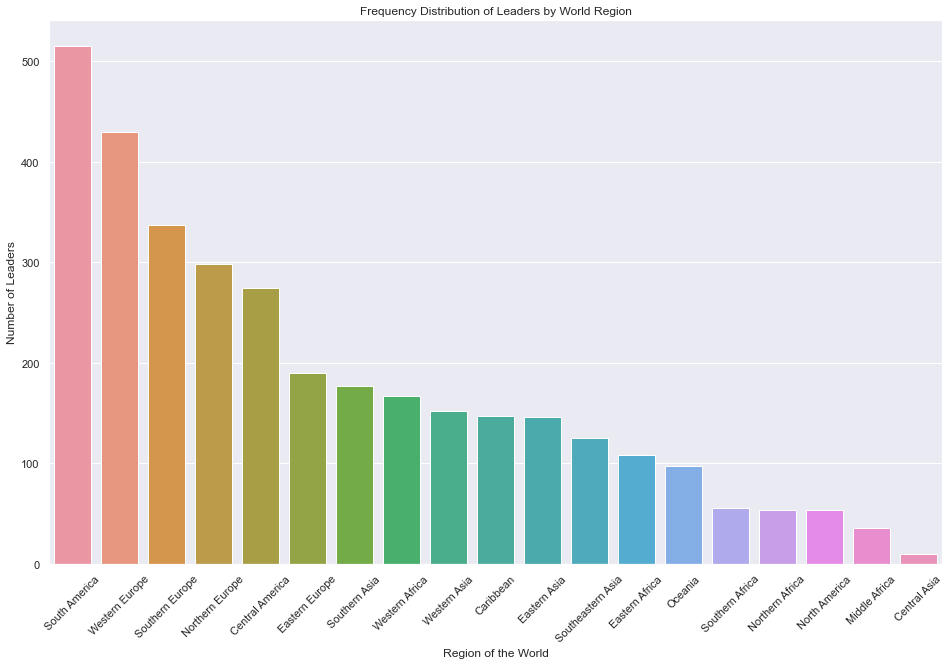

In [59]:
entry = df1['worldregion'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=entry.index,y=entry.values)
plt.title('Frequency Distribution of Leaders by World Region')
plt.ylabel('Number of Leaders', fontsize=12)
plt.xlabel('Region of the World', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [60]:
df1.groupby('prevtimesinoffice')['obsid'].nunique().sort_values(ascending = False)

prevtimesinoffice
0    2767
1     478
2     110
3      29
4      18
5       6
6       1
Name: obsid, dtype: int64

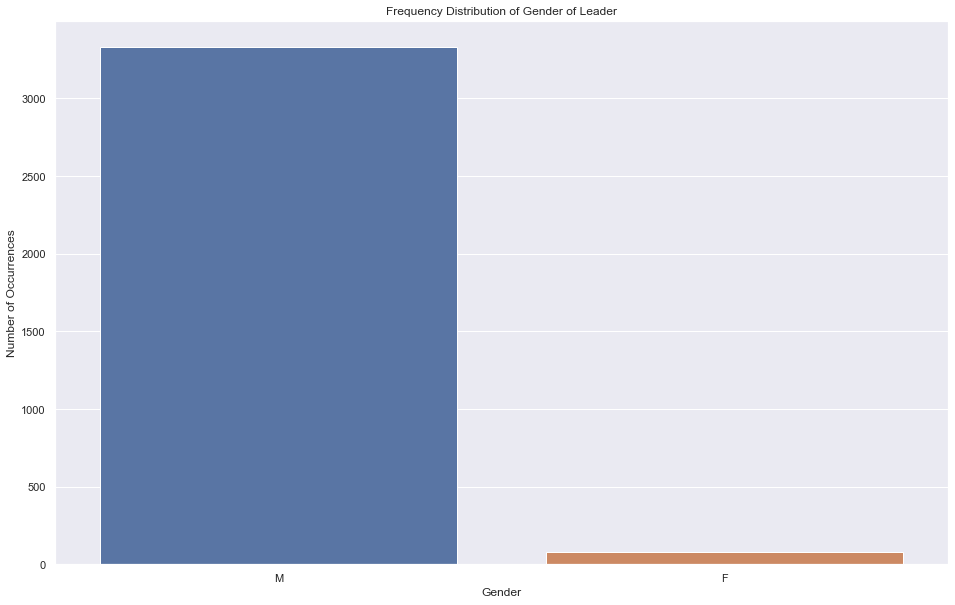

In [61]:
gender = df1['gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=gender.index, y=gender.values)
plt.title('Frequency Distribution of Gender of Leader')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

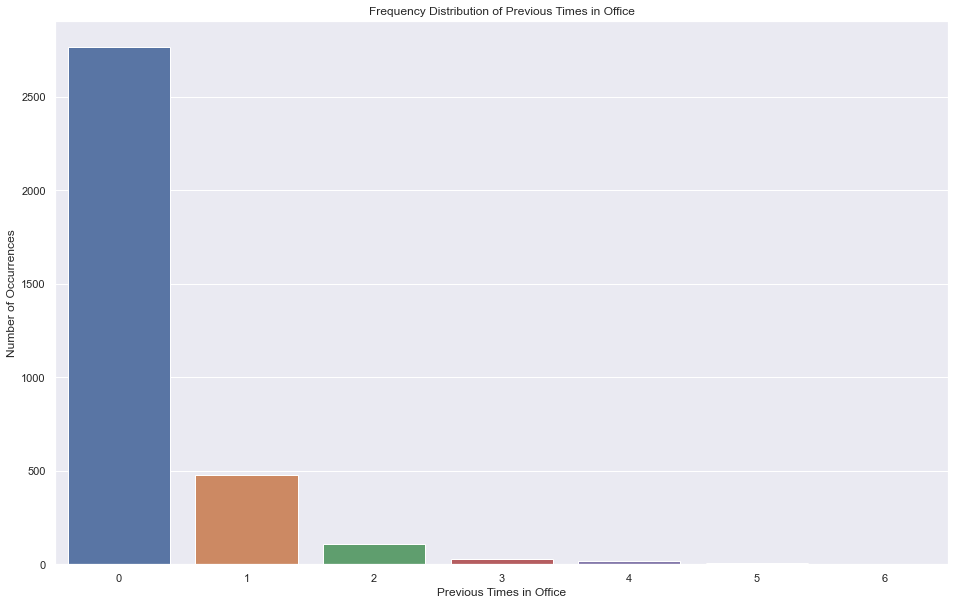

In [62]:
prevtimesinoffice = df1['prevtimesinoffice'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=prevtimesinoffice.index, y=prevtimesinoffice.values)
plt.title('Frequency Distribution of Previous Times in Office')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Previous Times in Office', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

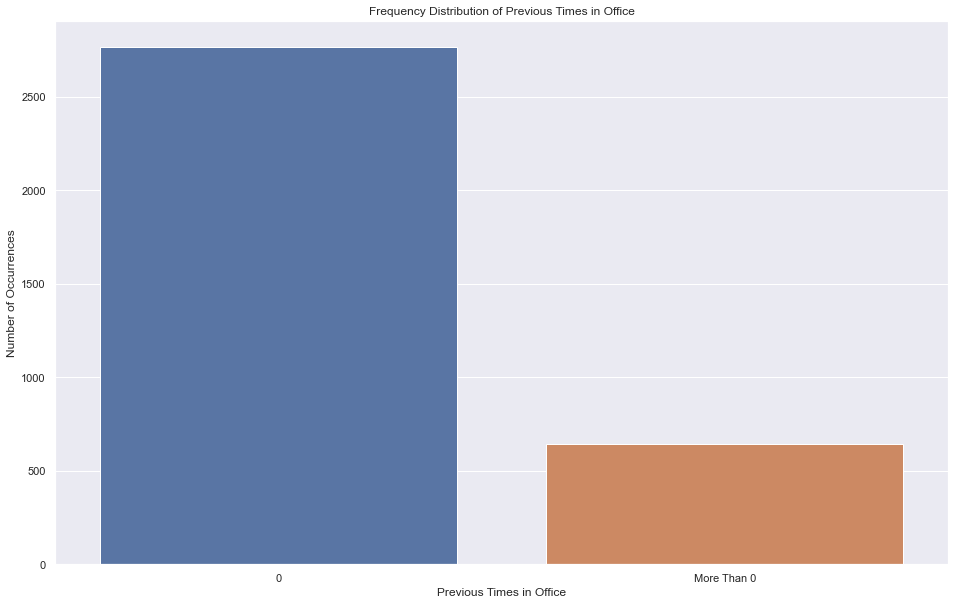

In [63]:
df1['prevtimesinoffice'] = df1['prevtimesinoffice'].apply(lambda x:'0' if x == 0 else 'More Than 0')
prevtimesinoffice = df1['prevtimesinoffice'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=prevtimesinoffice.index,y=prevtimesinoffice.values)
plt.title('Frequency Distribution of Previous Times in Office')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Previous Times in Office', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

### Regime Types Entry and Exit  <a class="anchor" id="regime_type"></a>

In [64]:
#This section will look at regime types by their methods of entry:
#Regular (Elections), Irregular (Wars or Coups), Foreign Imposition (Foreign Based Coups)
df1.groupby('entry')['obsid'].nunique().sort_values(ascending = False)

entry
Regular               2796
Irregular              571
Foreign Imposition      40
Unknown                  2
Name: obsid, dtype: int64

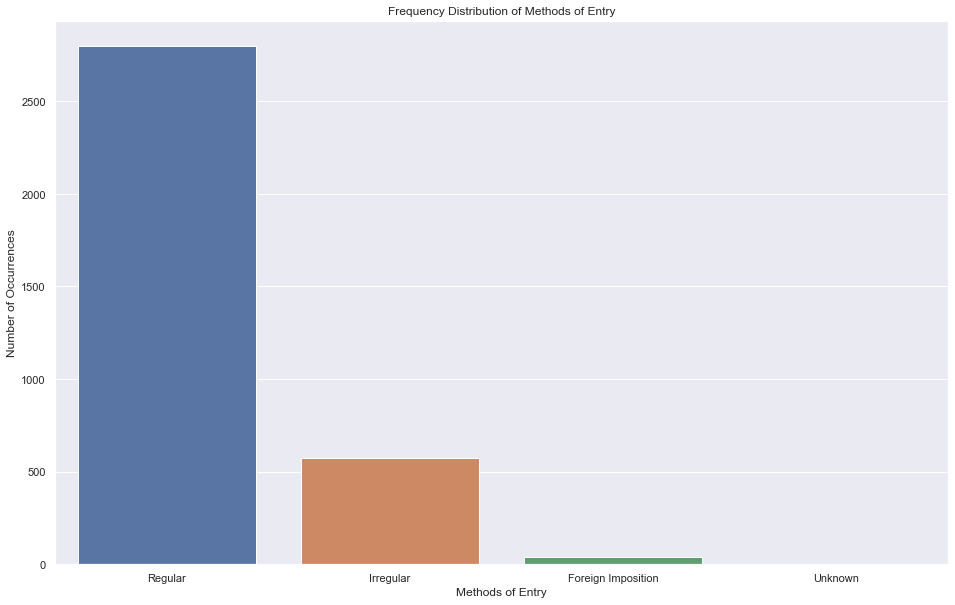

In [65]:
entry = df1['entry'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=entry.index,y=entry.values)
plt.title('Frequency Distribution of Methods of Entry')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Methods of Entry', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [66]:
df1.groupby('exit')['obsid'].nunique().sort_values(ascending = False)

exit
Regular                      2293
Irregular                     600
Natural Death                 202
Still in Office               168
Foreign                        72
Retired Due to Ill Health      68
Suicide                         3
Unknown                         3
Name: obsid, dtype: int64

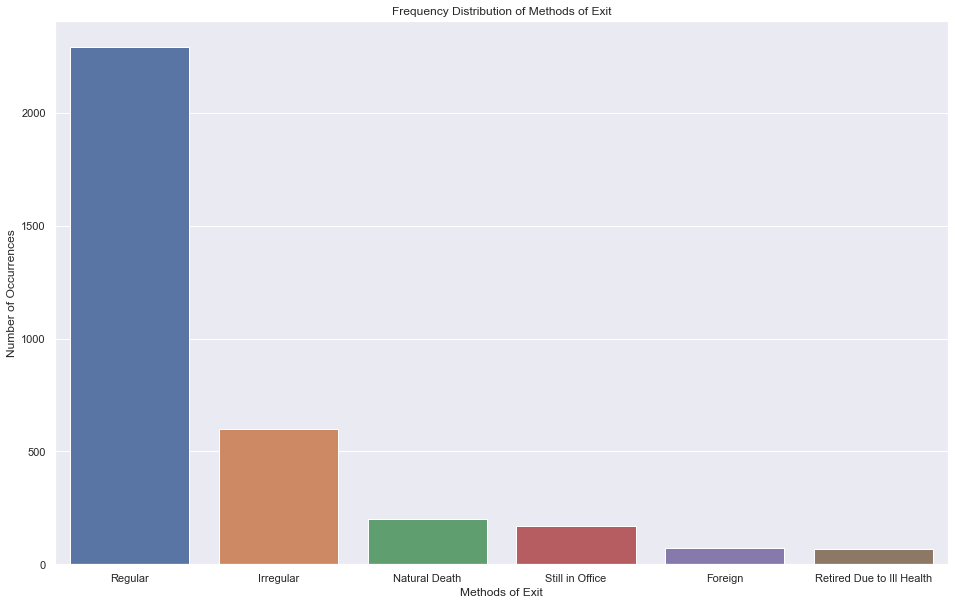

In [67]:
exit = df1['exit'].value_counts()
exit= exit.drop(labels=['Unknown','Suicide'])
sns.set(style="darkgrid")
sns.barplot(x=exit.index,y=exit.values)
plt.title('Frequency Distribution of Methods of Exit')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Methods of Exit', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [68]:
df1.groupby('posttenurefate')['obsid'].nunique().sort_values(ascending = False)

posttenurefate
OK                                                           2247
Exile                                                         397
Missing: Natural Death within Six Months of Losing Office     231
Imprisonment                                                  170
Leader Still in Office                                        167
Death                                                         117
Missing: No Information Found                                  47
Missing: Left Office after 2014-12-31                          30
Suicide                                                         3
Name: obsid, dtype: int64

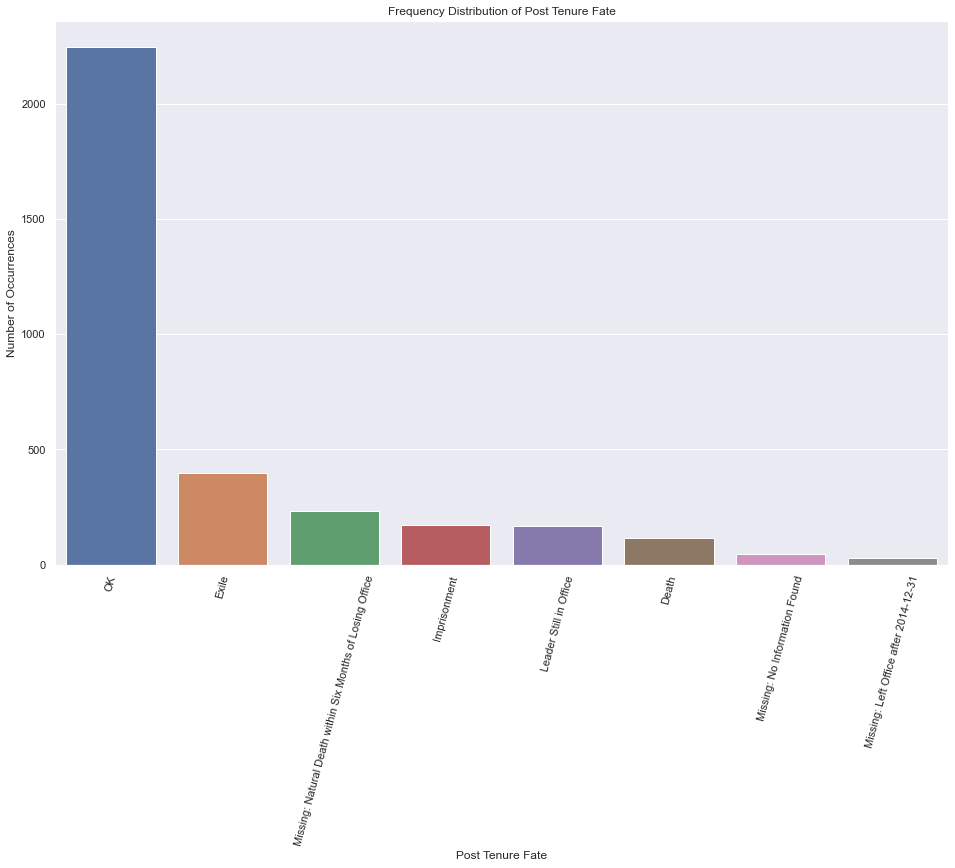

In [69]:
posttenurefate = df1['posttenurefate'].value_counts()
posttenurefate = posttenurefate.drop(labels=['Suicide'])
sns.set(style="darkgrid")
sns.barplot(x=posttenurefate.index,y=posttenurefate.values)
plt.title('Frequency Distribution of Post Tenure Fate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Post Tenure Fate', fontsize=12)
plt.xticks (rotation =75)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

### Time & Duration

This section will examine the regime durations (in days) by their geographical location. This is to identify is certain geographic regions naturally have longer or shorter duration types

In [70]:
df1['duration'] = pd.Series(delta.days for delta in (df1['enddate'] - df1['startdate']))

In [71]:
df_duration = df1[['iso', 'countrynames', 'worldregion',
       'leader', 'startdate', 'eindate', 'enddate', 'eoutdate','duration','entry',
       'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate', 'gender',
       'yrborn', 'yrdied', 'borndate', 'deathdate', 'numentry',
       'numexit', 'numexitcode', 'numposttenurefate', 'fties', 'ftcur']]

In [72]:
print (df_duration.duration.mean(),'days')

1553.2329128776767 days


In [73]:
#Data Displayed in Days
df_durationavg = df_duration.groupby('worldregion').duration.mean().sort_values(ascending = False)
print(df_durationavg)

worldregion
Middle Africa        3216.805556
Northern Africa      3149.129630
Eastern Africa       2966.879630
Western Asia         2755.559211
Central Asia         2728.000000
Western Africa       2315.491018
Southern Africa      2294.964286
Southeastern Asia    2165.832000
Southern Asia        1979.632768
North America        1953.592593
Eastern Europe       1825.163158
Eastern Asia         1582.602740
Caribbean            1418.000000
Central America      1363.752727
Oceania              1307.402062
Northern Europe      1154.429530
South America        1101.382524
Southern Europe      1073.106825
Western Europe        835.888372
Name: duration, dtype: float64


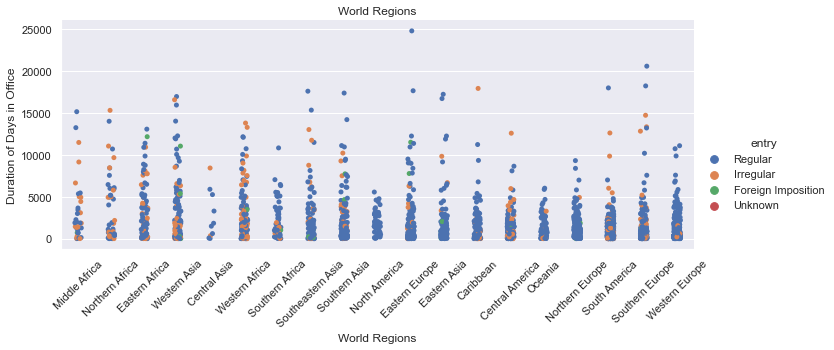

In [74]:
# This graph shows the Duration of "Types of Regime Entry" by World Regions. 

duration_graph = sns.catplot(x='worldregion', y='duration',hue ='entry', data = df_duration, height=4, aspect=2.5,
                                order = ['Middle Africa','Northern Africa','Eastern Africa',
                                'Western Asia','Central Asia','Western Africa','Southern Africa','Southeastern Asia',
                                'Southern Asia','North America','Eastern Europe','Eastern Asia','Caribbean','Central America',
                               'Oceania','Northern Europe','South America','Southern Europe','Western Europe']) 
sns.set(style="darkgrid")
plt.title('World Regions')
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('World Regions', fontsize=12)
plt.xticks (rotation =45)
plt.show()


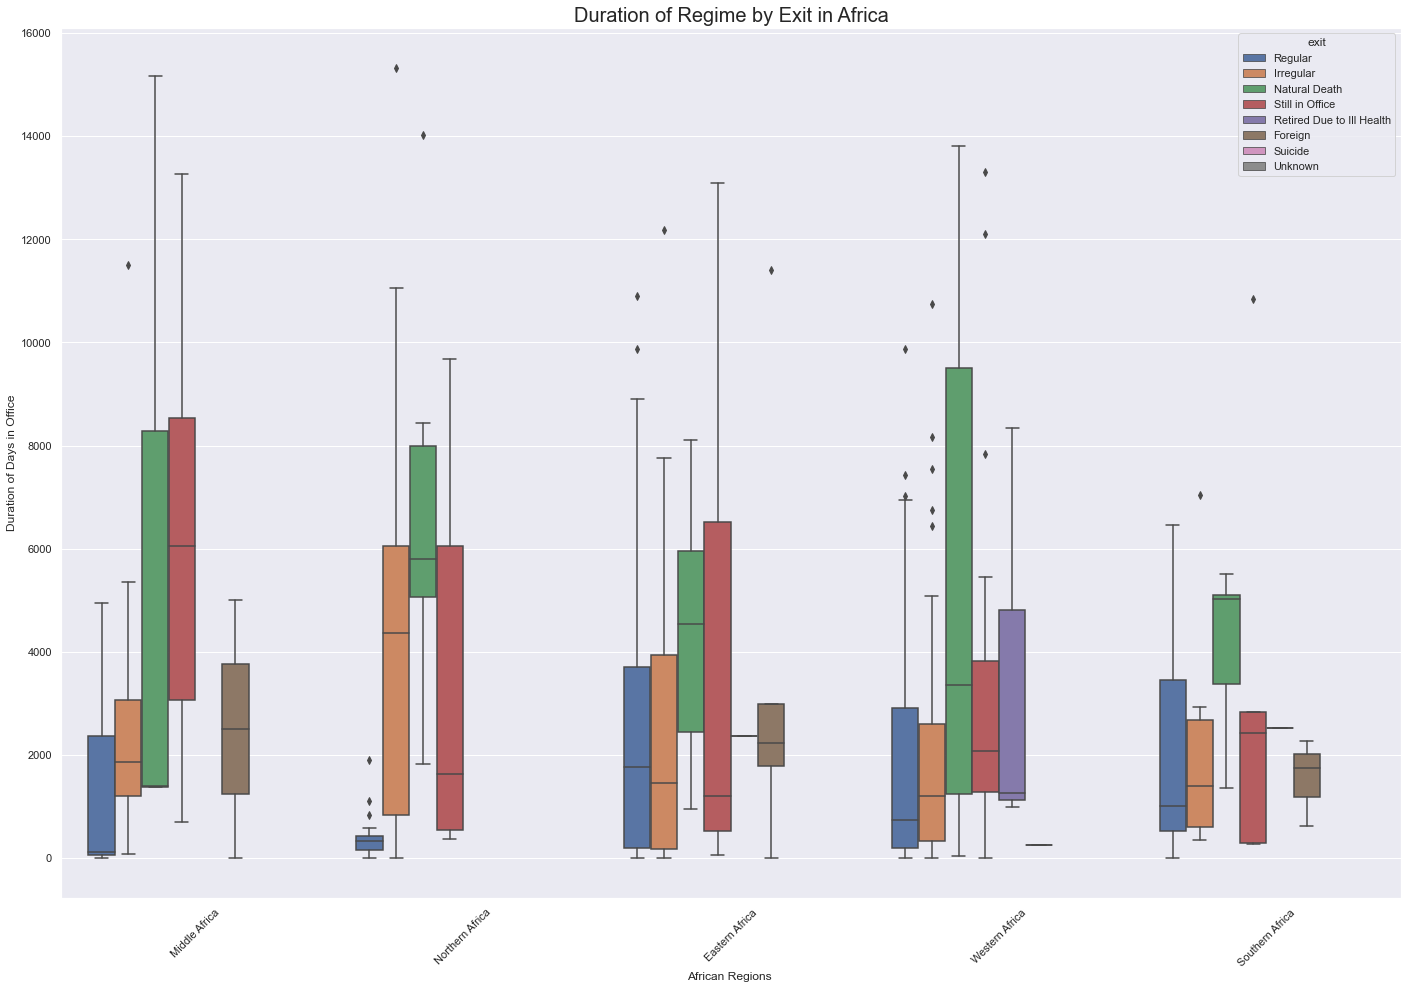

In [75]:
# This graph shows the Duration of "Types of Regime Exit" by World Regions: Africa, Asia, America, Europe, Oceania 

duration_graph = sns.boxplot(x='worldregion', y='duration',hue ='exit', data = df_duration,
                                order = ['Middle Africa','Northern Africa','Eastern Africa','Western Africa','Southern Africa']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in Africa', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('African Regions ', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

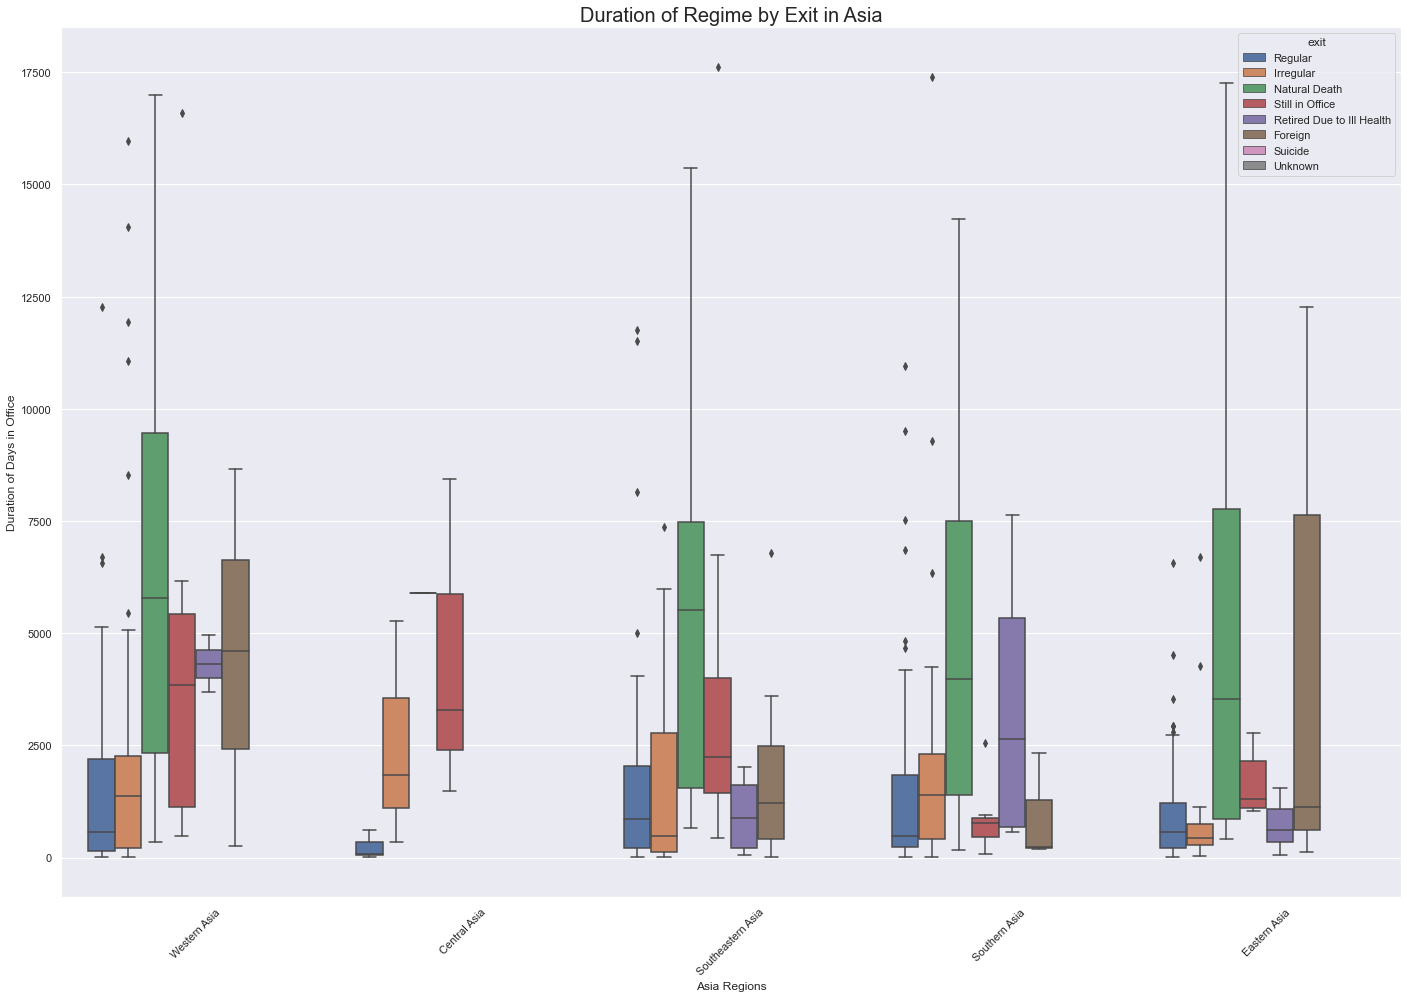

In [76]:
duration_graph = sns.boxplot(x ='worldregion', y ='duration',hue ='exit', data = df_duration,
                                order = ['Western Asia','Central Asia','Southeastern Asia','Southern Asia','Eastern Asia']) 
sns.set(style ="darkgrid")
plt.title('Duration of Regime by Exit in Asia', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize = 12)
plt.xlabel('Asia Regions', fontsize = 12)
plt.xticks (rotation = 45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

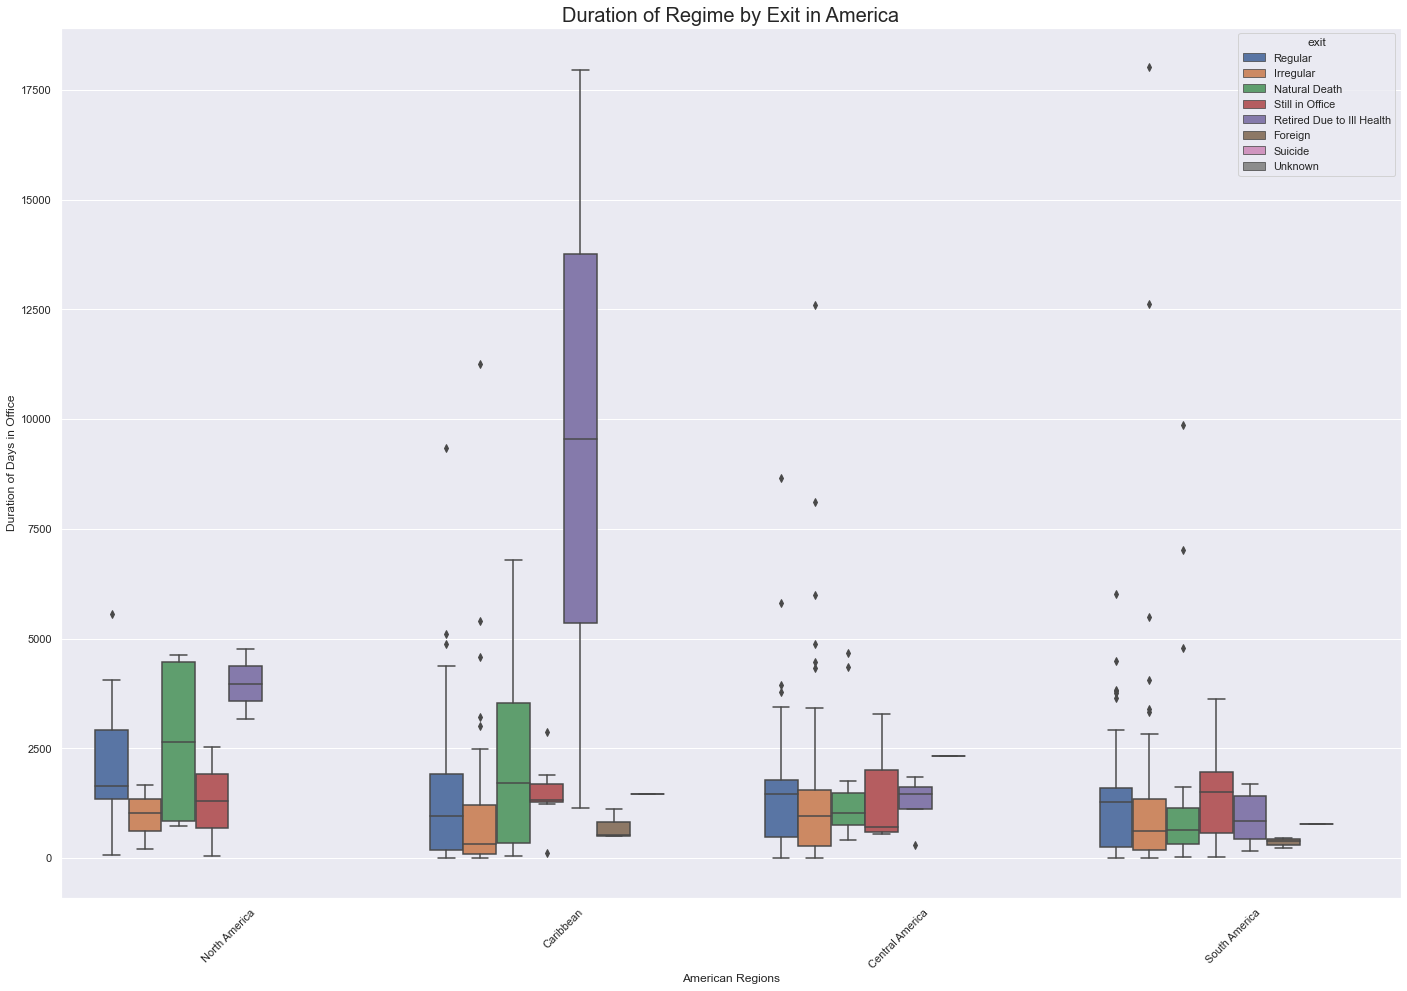

In [77]:
duration_graph = sns.boxplot(x ='worldregion', y ='duration',hue ='exit', data = df_duration,
                                order = ['North America','Caribbean','Central America','South America']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in America',fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize = 12)
plt.xlabel('American Regions', fontsize = 12)
plt.xticks (rotation = 45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

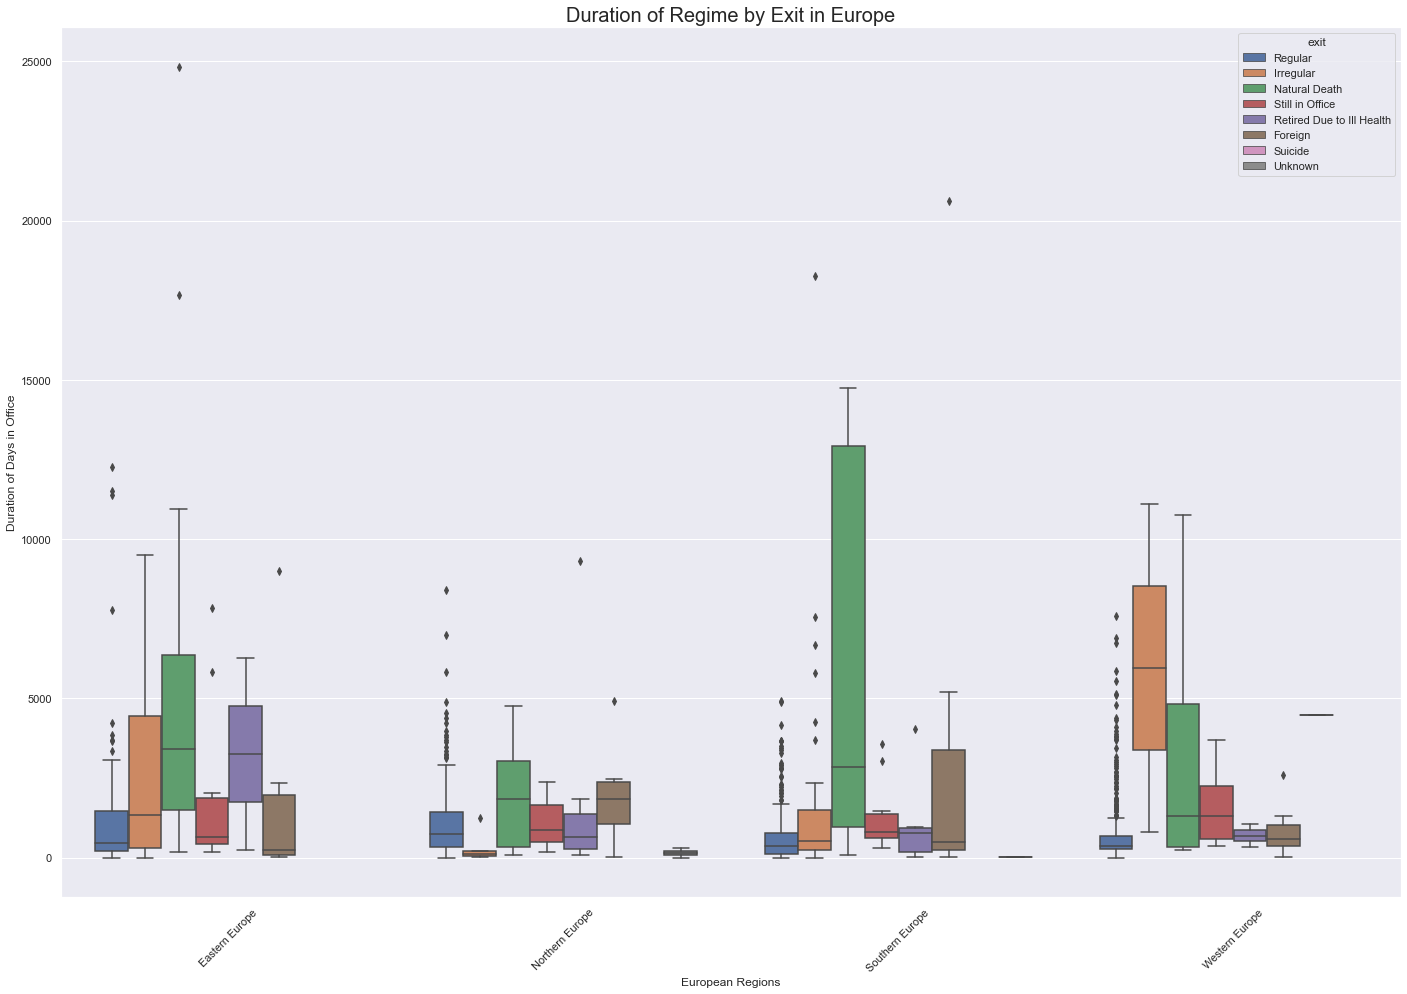

In [78]:
duration_graph = sns.boxplot(x='worldregion', y='duration',hue ='exit', data = df_duration,
                                order = ['Eastern Europe','Northern Europe','Southern Europe','Western Europe']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in Europe', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('European Regions', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()